# <div style="text-align: center">Advanced Python Project - Vin de Renom</div>
_<div style="text-align: center">Nicolas POUGET, Mohammad AWWAD, Mohamad ALHALABI</div>_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

## _Partie 1: Exploration_

### _On commence par importer les données et examiner les colonnes :_

In [2]:
cms_df = pd.read_excel('web.xlsx')
cms_df

D:\Users\mOh\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [3]:
cms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

### _On voit que la colonne `sku` n'est pas totalement non null comme elle doit l'être. Elle doit representer les `order_id` qui sert à identifier de facon unique chaque transaction._

In [4]:
erp_df = pd.read_excel('erp.xlsx')
erp_df

D:\Users\mOh\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [5]:
erp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### _Pas de colonnes vides dans cette table, mais une relation existe entre les deux dernières colonnes et donc il faut vérifier sa validité_

In [6]:
key_df = pd.read_excel('liaison.xlsx')
key_df

D:\Users\mOh\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [7]:
key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### _On peut voir que la table des liaisons manquent des valeurs (734 non-null / 825 total). Etant une table de liaison, il faut prévoir une relation One-to-One dans cette table et donc on ne peut pas laisser des valeurs vides_

## _Partie 2 : Nettoyage_

### _On commence par la table du CMS pour voir les lignes sans `sku` (null) et la possibilité de les éliminer_

In [8]:
# Filtrer les lignes ou le SKU est NaN
cms_df[cms_df.sku.isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### _D'un aperçu rapide, il semble que ces lignes sont bien inutiles mais on check davantage pour avoir le feu vert._

In [9]:
cms_df[cms_df.sku.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

### _Il semble que certaines lignes ne sont pas vides, il faut filter pour les voir._

In [10]:
cms_df[cms_df.sku.isna()][-cms_df[cms_df.sku.isna()].total_sales.isna()]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


### _Vu que `total_sales` est 0 pour ces deux lignes, on peut s'en debarrasser._

In [11]:
cleaned_cms_df = cms_df.dropna(subset=['sku'])
cleaned_cms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

### _On peut également enlever tous les lignes ou `total_sales` est 0 vu que ca n'affecte pas le chiffre d'affaire et pollue le nombre de vrai ventes._

In [12]:
cleaned_cms_df.total_sales.describe()


count    1428.000000
mean        4.012605
std         8.515198
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        96.000000
Name: total_sales, dtype: float64

### _On a un min de 0 dans `total_sales` actuellement._

In [13]:
cleaned_cms_df = cleaned_cms_df[cleaned_cms_df.total_sales != 0]
cleaned_cms_df.total_sales.describe()


count    770.000000
mean       7.441558
std       10.440361
min        1.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       96.000000
Name: total_sales, dtype: float64

### _On passe ensuite à valider la table `erp`._ 

In [14]:
# Filtrer les lignes ou stock quantity est 0 mais le statut n'est pas out of stock
erp_df[erp_df.stock_quantity ==
       0][erp_df[erp_df.stock_quantity == 0].stock_status != 'outofstock']


,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


### _On corrige cette ligne_

In [15]:
cleaned_erp_df = erp_df
cleaned_erp_df.at[443, 'stock_status'] = 'outofstock'
cleaned_erp_df[cleaned_erp_df.stock_quantity ==
               0][cleaned_erp_df[cleaned_erp_df.stock_quantity == 0].stock_status != 'outofstock']


,product_id,onsale_web,price,stock_quantity,stock_status


### _Mainteant, à l'aide de la table `liaison`, on check si les produits n'ayant pas un `web_id`/`sku` ont été référencés dans `cms`_

In [16]:
# JOIN ERP WITH KEY (LIAISON) TO ADD COL ID_WEB/SKU
merged_erp = cleaned_erp_df.merge(key_df, on='product_id')
merged_erp.dropna(subset=['id_web'], inplace=True)
merged_erp

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [17]:
# LEFT JOIN CMS WITH ERP 
centered_df = cleaned_cms_df.merge(merged_erp, left_on='sku', right_on='id_web')
centered_df

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,outofstock,bon-cadeau-25-euros
1,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,0.0,attachment,image/jpeg,0.0,4954,1,25.0,0,outofstock,bon-cadeau-25-euros
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,15298
3,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,0.0,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock,15298
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,19814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,15845,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-04-25 12:43:23,...,0.0,attachment,image/jpeg,0.0,6926,1,49.9,24,instock,15845
766,15741,0,0,0,0.0,2.0,taxable,NaN,2.0,2020-04-25 12:49:49,...,0.0,product,NaN,0.0,6928,1,19.0,20,instock,15741
767,15741,0,0,0,0.0,2.0,NaN,NaN,2.0,2020-04-25 12:49:49,...,0.0,attachment,image/jpeg,0.0,6928,1,19.0,20,instock,15741
768,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,0.0,product,NaN,0.0,6930,1,8.4,83,instock,16135


### _Après avoir rapprocher les tables, on voit si certain `sku` n'ont pas de `product_id`_

In [18]:
centered_df[centered_df.product_id.isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web


### _Pas de lignes n'ayant de `product_id`._

## _Partie 3 :  Analyse_

### _Pour trouver le chiffre d'affaire réalisé par produit, on fait :_

In [19]:
# On groupe par nom de produit et le prix et fait la somme des total_sales puis on les rend des colonnes pour pouvoir les utiliser
price_per_product = centered_df[['post_title', 'price', 'total_sales']].groupby(
    ['post_title', 'price']).sum().reset_index(level=['post_title', 'price'])
# CA = Qtt x Prix
price_per_product['chiffre_affaire'] = price_per_product.price * \
    price_per_product.total_sales
price_per_product


,post_title,price,total_sales,chiffre_affaire
0,Agnès Levet Côte Rôtie Améthyste 2017,41.2,8.0,329.6
1,Agnès Levet Côte Rôtie Maestria 2017,55.0,6.0,330.0
2,Agnès Levet Côte Rôtie Péroline 2017,57.0,6.0,342.0
3,Alain Graillot Crozes-Hermitage Blanc 2018,24.4,20.0,488.0
4,Alain Graillot Crozes-Hermitage Rouge 2017,24.4,12.0,292.8
...,...,...,...,...
380,Xavier Frissant Touraine Les Roses du Clos 2018,12.8,30.0,384.0
381,Xavier Frissant Touraine Sauvignon 2019,9.7,6.0,58.2
382,Zind-Humbrecht Muscat Turckheim 2016,17.9,2.0,35.8
383,Zind-Humbrecht Riesling Herrenweg de Turckheim...,31.7,4.0,126.8


### _Le chiffre d'affaire total est :_

In [20]:
price_per_product['chiffre_affaire'].sum()

141137.2

### _Concernant les prix des produits:_

In [21]:
price_per_product.price.describe()

count    385.000000
mean      26.581429
std       24.934530
min        5.700000
25%       12.500000
50%       19.000000
75%       31.700000
max      225.000000
Name: price, dtype: float64

### _Pour visualiser des outliers dans les prix des produits, on utilise les 4 méthodes suivantes :_

### _Boxplot_

<AxesSubplot:>

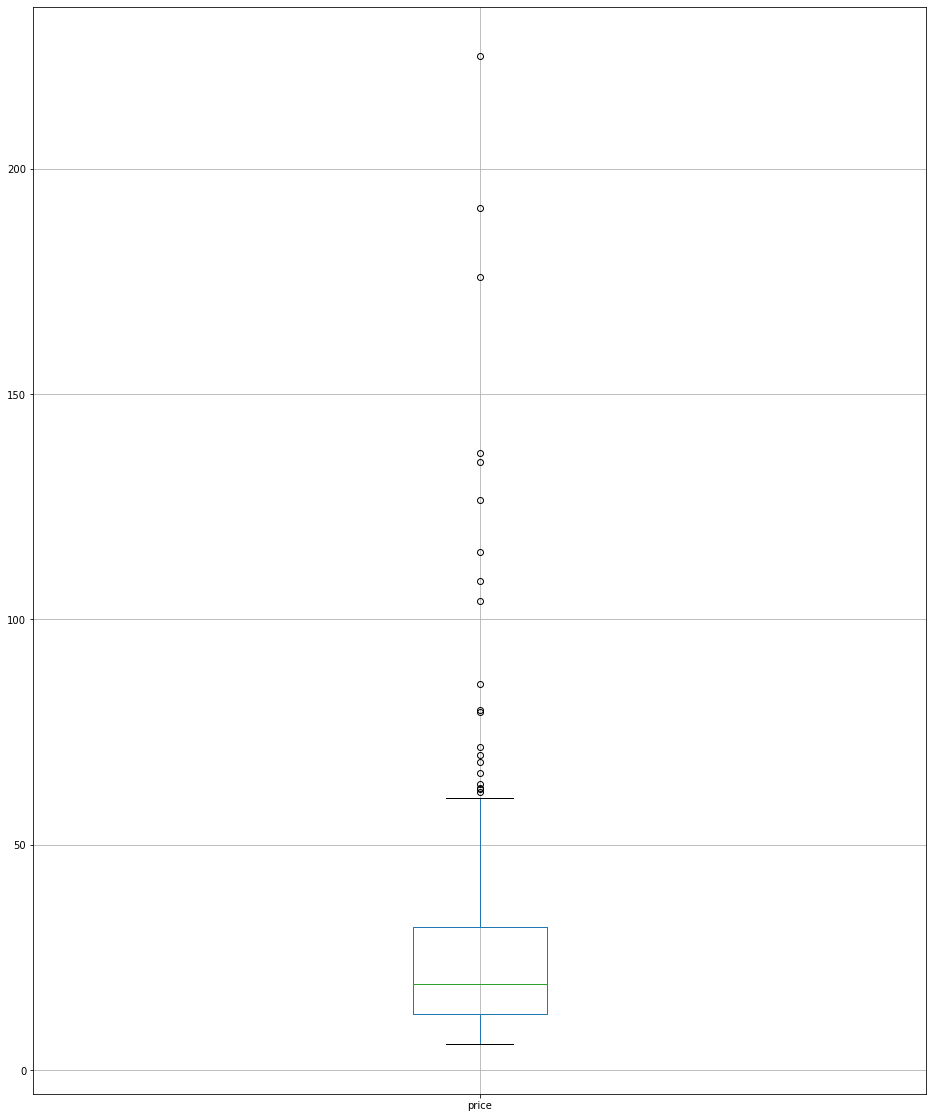

In [22]:
price_per_product.boxplot(column='price', figsize=(16,20))